In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [ ]:
usa_housing_data = pd.read_csv('USA_Housing.csv')
usa_housing_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
df = usa_housing_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:

df = df.drop('Address', axis=1)
df = df[:].round(2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108950,5.977278,6.987770,3.981330,36163.516088,1.232073e+06
std,10657.991228,0.991437,1.005799,1.234137,9925.650059,3.531176e+05
min,17796.630000,2.640000,3.240000,2.000000,172.610000,1.593866e+04
25%,61480.565000,5.320000,6.300000,3.140000,29403.930000,9.975771e+05
50%,68804.285000,5.970000,7.000000,4.050000,36199.405000,1.232669e+06
75%,75783.342500,6.650000,7.670000,4.490000,42861.290000,1.471210e+06
max,107701.750000,9.520000,10.760000,6.500000,69621.710000,2.469066e+06


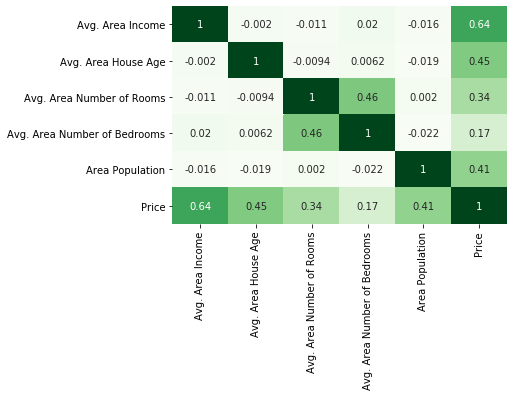

In [ ]:
sns.heatmap(df.corr(), cbar=False, annot=True, cmap="Greens")

In [ ]:
# Preparação do Modelo

X, y = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']], df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)


In [ ]:
# Treinamento do modelo

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Imprimindo os resultados

print('Coefficients: {0}'.format(model.coef_))
print('Mean squared error: {0:.2f}'.format(mean_squared_error(y_test,y_pred)))
print('Variance score: {0:.2f}'.format(r2_score(y_test, y_pred)))

Coefficients: [225216.28042156 164896.87566029 119084.45293186   2973.19905143
 150351.67811421]
Mean squared error: 10072375945.79
Variance score: 0.91


In [ ]:
# Usando cross validation
clf = LinearRegression()
score = cross_val_score(clf, X_train, y_train, cv=5)
print('Accuracy: {0:.2f} (+/- {1:.2f})'.format(score.mean(), score.std() * 2))

Accuracy: 0.92 (+/- 0.01)


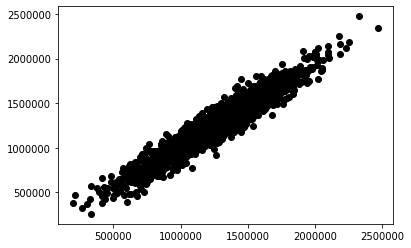

In [ ]:
# Exibindo alguns resultados
plt.scatter(y_test, y_pred, color='black')

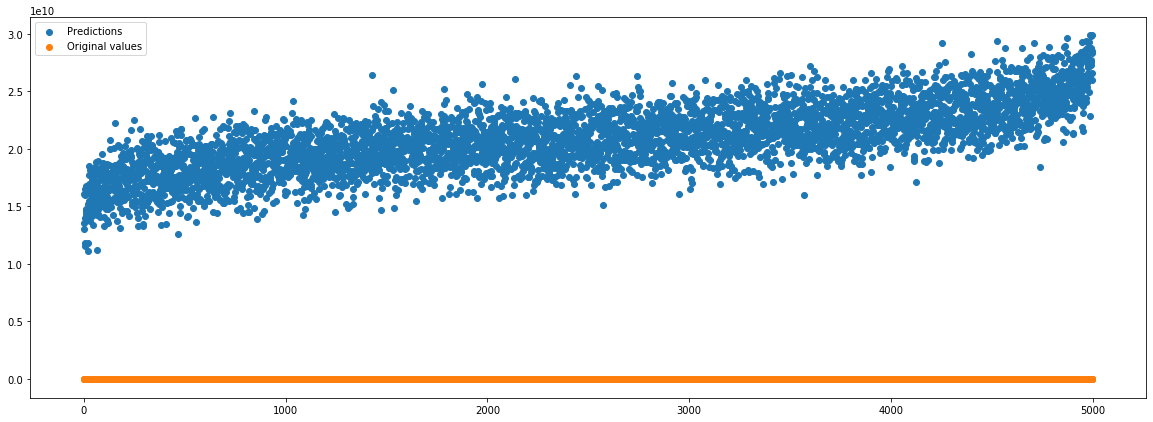

In [ ]:
# Dispersão de pred. vs y
plt.figure(figsize=(20,7))
idx = np.argsort(y)
preds = model.predict(X)
plt.scatter(range(len(y)), preds[idx], label='Predictions')
plt.scatter(range(len(y)), y[idx], label='Original values')
plt.legend()

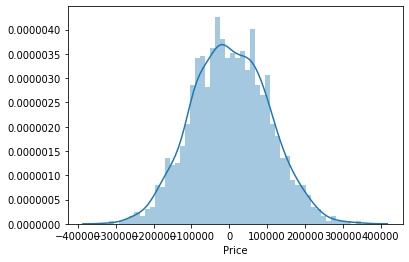

In [ ]:
# Distribuição do erro
sns.distplot((y_test-y_pred), bins=50)